## Preprocessing

In [89]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf



In [90]:
from google.colab import files
uploaded = files.upload()



Saving charity_data.csv to charity_data (2).csv


In [91]:
#  Import and read the charity_data.csv.
import io
import pandas as pd 
application_df = pd.read_csv(io.BytesIO(uploaded['charity_data.csv']))
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [92]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(["EIN","NAME"],axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [93]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique(axis=0)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [94]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_df["APPLICATION_TYPE"].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [95]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_types_to_replace=['T9','T13','T12','T2','T25','T14','T29','T15','T17']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [96]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
application_df["CLASSIFICATION"].value_counts()


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1570        1
C1732        1
C2561        1
C2570        1
C4500        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [97]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
application_df["CLASSIFICATION"].value_counts()[application_df["CLASSIFICATION"].value_counts()>1]




C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C2400        6
C1720        6
C4100        6
C1600        5
C1257        5
C0           3
C2710        3
C1260        3
C1267        2
C3200        2
C1234        2
C1256        2
C1246        2
Name: CLASSIFICATION, dtype: int64

In [98]:
cutoff_class=application_df["CLASSIFICATION"].value_counts()[application_df["CLASSIFICATION"].value_counts()<1000]
classifications_to_replace=cutoff_class.index
classifications_to_replace

Index(['C7000', 'C1700', 'C4000', 'C5000', 'C1270', 'C2700', 'C2800', 'C7100',
       'C1300', 'C1280', 'C1230', 'C1400', 'C2300', 'C7200', 'C1240', 'C8000',
       'C7120', 'C1500', 'C6000', 'C1800', 'C1250', 'C8200', 'C1238', 'C1278',
       'C1237', 'C1235', 'C7210', 'C2400', 'C1720', 'C4100', 'C1600', 'C1257',
       'C0', 'C2710', 'C1260', 'C1267', 'C3200', 'C1234', 'C1256', 'C1246',
       'C5200', 'C2380', 'C6100', 'C1248', 'C1580', 'C1370', 'C2190', 'C4120',
       'C1245', 'C4200', 'C2500', 'C8210', 'C1820', 'C2170', 'C1236', 'C3700',
       'C1283', 'C2150', 'C1728', 'C1900', 'C2600', 'C1570', 'C1732', 'C2561',
       'C2570', 'C4500'],
      dtype='object')

In [99]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [100]:
# Convert categorical data to numeric with `pd.get_dummies`
df_numerical = pd.get_dummies(application_df)
#  YOUR CODE GOES HERE
df_numerical.dtypes

STATUS                          int64
ASK_AMT                         int64
IS_SUCCESSFUL                   int64
APPLICATION_TYPE_Other          uint8
APPLICATION_TYPE_T10            uint8
APPLICATION_TYPE_T19            uint8
APPLICATION_TYPE_T3             uint8
APPLICATION_TYPE_T4             uint8
APPLICATION_TYPE_T5             uint8
APPLICATION_TYPE_T6             uint8
APPLICATION_TYPE_T7             uint8
APPLICATION_TYPE_T8             uint8
AFFILIATION_CompanySponsored    uint8
AFFILIATION_Family/Parent       uint8
AFFILIATION_Independent         uint8
AFFILIATION_National            uint8
AFFILIATION_Other               uint8
AFFILIATION_Regional            uint8
CLASSIFICATION_C1000            uint8
CLASSIFICATION_C1200            uint8
CLASSIFICATION_C2000            uint8
CLASSIFICATION_C2100            uint8
CLASSIFICATION_C3000            uint8
CLASSIFICATION_Other            uint8
USE_CASE_CommunityServ          uint8
USE_CASE_Heathcare              uint8
USE_CASE_Oth

In [101]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
target = pd.DataFrame(df_numerical.IS_SUCCESSFUL).values.reshape(-1, 1)
features = df_numerical.drop("IS_SUCCESSFUL", axis=1).values


# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [102]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [103]:
number_input_features = len(X_train_scaled[0])
number_input_features

43

## Compile, Train and Evaluate the Model

In [104]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=80, input_dim=number_input_features, activation="relu"))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3520      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [105]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [106]:
# Add model weight checkpoints during training
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path="checkpoints/weights.{epoch}.hdf5"

# Create callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq="epoch",
                              period=5)

In [107]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5699 - accuracy: 0.7200
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5549 - accuracy: 0.7281
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5508 - accuracy: 0.7299
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5502 - accuracy: 0.7290
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5490 - accuracy: 0.7308

Epoch 00005: saving model to checkpoints/weights.5.hdf5
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5479 - accuracy: 0.7305
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5475 - accuracy: 0.7324
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5469 - accuracy: 0.7313
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5463 - accuracy: 0.7338
Epoch 10/100
804/804 [============

In [108]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5698 - accuracy: 0.7296
Loss: 0.5698460936546326, Accuracy: 0.7295626997947693


In [109]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn.save("AlphabetSoupCharity.h5")

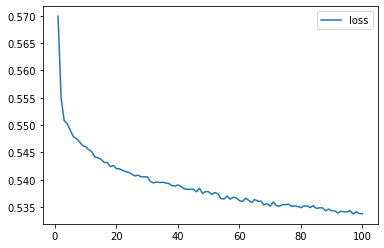

In [110]:
pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1)).plot(y="loss")


##Optimize the Model

In [114]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=80,
        step=2), activation=activation, input_dim=number_input_features))
      
    # Choose an optimal value from 0.01, 0.001, or 0.0001
   # hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=80,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [112]:
!pip install -q -U keras-tuner

In [115]:
# Import the kerastuner library

import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [116]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

INFO:tensorflow:Oracle triggered exit


In [117]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 9,
 'num_layers': 4,
 'tuner/bracket': 0,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/round': 0,
 'units_0': 7,
 'units_1': 5,
 'units_2': 7,
 'units_3': 5,
 'units_4': 9,
 'units_5': 5}

In [118]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5492 - accuracy: 0.7349
Loss: 0.5492064356803894, Accuracy: 0.7349271178245544


In [119]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 396       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 70        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 594
Trainable params: 594
Non-trainable params: 0
__________________________________________________________

In [85]:
# Export and save model to HDF5 file
best_model.save("AlphabetSoupCharity_Optimization.h5")